In [1]:
!pip install -q keras
import keras

In [2]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [3]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


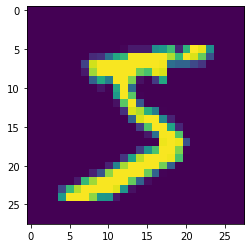

In [4]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [5]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
from keras.layers import Activation,BatchNormalization

#MODEL1

In [9]:
model1 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model1.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model1.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model1.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(14, 3, activation='relu'))#10                     # channel dimensions = 10x10x14    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(14, 3, activation='relu'))#8                      # channel dimensions = 8x8x14    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(12, 5, activation='relu'))#6                      # channel dimensions = 4x4x12   
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model1.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model1.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        1

In [10]:



# We are importing the learningratescheduler callback

#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 51s 10ms/step - loss: 0.4749 - accuracy: 0.8499 - val_loss: 0.2096 - val_accuracy: 0.9325
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 3s 7ms/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.0396 - val_accuracy: 0.9872
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 3s 7ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0327 - val_accuracy: 0.9891
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 3s 

In [11]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model1.predict(X_test)
index1={}
for i, k in enumerate(y_pred[1:2][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[1:2][0])

[0.025077804923057556, 0.9926000237464905]
Prediction: 2
Actual 2


#MODEL2

In [15]:
model2 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model2.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model2.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model2.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(14, 3, activation='relu'))#10                     # channel dimensions = 10x10x14    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(14, 7, activation='relu'))#8                      # channel dimensions = 4x4x14    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model2.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model2.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 10)       

In [16]:



# We are importing the learningratescheduler callback

#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model2.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 5s 8ms/step - loss: 0.4308 - accuracy: 0.8651 - val_loss: 0.0990 - val_accuracy: 0.9699
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 3s 7ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0642 - val_accuracy: 0.9790
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 3s 6ms/step - loss: 0.0472 - accuracy: 0.9864 - val_loss: 0.0354 - val_accuracy: 0.9881
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 3s 6ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0282 - val_accuracy: 0.9897
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 3s 6m

In [14]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model2.predict(X_test)
index1={}
for i, k in enumerate(y_pred[1:2][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[1:2][0])

[0.023714520037174225, 0.9932000041007996]
Prediction: 2
Actual 2


#MODEL3

In [15]:
model3 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model3.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model3.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model3.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(14, 3, activation='relu'))#10                     # channel dimensions = 10x10x14    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(14, 3, activation='relu'))#8                      # channel dimensions = 8x8x14    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(12, 3, activation='relu'))#6                      # channel dimensions = 6x6x12   
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(12, 3, activation='relu'))#4                      # channel dimensions = 4x4x12    
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model3.add(Flatten())
model3.add(Dense(10,activation='relu'))                                    # Fully Connected Layer
#Using softmax activation function at the last layer which is used for multi class classification
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 10)       

In [16]:



# We are importing the learningratescheduler callback

#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


469/469 [==============================] - 7s 10ms/step - loss: 0.6321 - accuracy: 0.7963 - val_loss: 0.3020 - val_accuracy: 0.9009
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 4s 8ms/step - loss: 0.0858 - accuracy: 0.9726 - val_loss: 0.0512 - val_accuracy: 0.9851
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 4s 8ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 4s 8ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0345 - val_accuracy: 0.9894
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 4s 8ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0381 - val_accuracy: 0.9

In [17]:
score = model3.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model3.predict(X_test)
index1={}
for i, k in enumerate(y_pred[1:2][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[1:2][0])

[0.020608754828572273, 0.9940999746322632]
Prediction: 2
Actual 2


#MODEL4

In [12]:
model4 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model4.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model4.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model4.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(14, 3, activation='relu'))#10                     # channel dimensions = 10x10x14    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(16, 3, activation='relu'))#8                      # channel dimensions = 8x8x16    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(14, 3, activation='relu'))#6                      # channel dimensions = 6x6x14   
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(12, 3, activation='relu'))#4                      # channel dimensions = 4x4x12    
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model4.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model4.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model4.add(Activation('softmax'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 10)       

In [13]:



# We are importing the learningratescheduler callback

#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model4.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


469/469 [==============================] - 7s 10ms/step - loss: 0.5559 - accuracy: 0.8189 - val_loss: 0.6918 - val_accuracy: 0.7856
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 4s 8ms/step - loss: 0.0711 - accuracy: 0.9775 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 4s 8ms/step - loss: 0.0563 - accuracy: 0.9818 - val_loss: 0.0479 - val_accuracy: 0.9849
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 4s 8ms/step - loss: 0.0470 - accuracy: 0.9842 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 4s 8ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0327 - val_accuracy: 0.9

In [14]:
score = model4.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model4.predict(X_test)
index1={}
for i, k in enumerate(y_pred[:1][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[:1][0])

[0.02203586883842945, 0.993399977684021]
Prediction: 7
Actual 7


#MODEL5

In [9]:
model5 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model5.add(BatchNormalization())
model5.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model5.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model5.add(BatchNormalization())
model5.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model5.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model5.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(16, 5, activation='relu'))#10                     # channel dimensions = 8x8x16   
model5.add(BatchNormalization())
model5.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(10, 3, activation='relu'))#8                      # channel dimensions = 6x6x10  
model5.add(BatchNormalization())
model5.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(14, 3, activation='relu'))#6                      # channel dimensions = 4x4x14   
model5.add(BatchNormalization())
model5.add(Dropout(0.2))


# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model5.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model5.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model5.add(Activation('softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        1

In [10]:



# We are importing the learningratescheduler callback

#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model5.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 51s 10ms/step - loss: 0.5031 - accuracy: 0.8374 - val_loss: 0.3829 - val_accuracy: 0.8815
Epoch 2/25

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 3s 7ms/step - loss: 0.0848 - accuracy: 0.9735 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 3/25

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 3s 7ms/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 0.0520 - val_accuracy: 0.9831
Epoch 4/25

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 3s 7ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 5/25

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 3s 

In [11]:
score = model5.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model5.predict(X_test)
index1={}
for i, k in enumerate(y_pred[:1][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[:1][0])

[0.023136261850595474, 0.9927999973297119]
Prediction: 7
Actual 7
